In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel
%matplotlib inline

# Problem 3c.

$$4\int_0^1\frac{1}{1+x^2}=4\int_0^1(1-x^2+x^4-x^6\ldots)=\pi$$

In [2]:
#Even powered sum
def int(n):
    s=0
    p=0
    for i in range(1, 2*n):
        if(i%2!=0):
            s+=((-1)**p)*(1**i)/i
            p+=1
    return s

In [3]:
#Much trial and error to get it narrowed down
i=136110
tol=10e-6
err = 4*int(2)-3.14159
while (abs(err) >tol):
    i+=1
    err = 4*int(i)-3.14159
    print(4*int(i))
print(i)
#4*int(140001)-3.14159 ###79030
#273704 85812
#13600

3.1416000005345226
3.141585306698954
136112


In [4]:
#Finalized number
4*int(136121)

3.141599999994786

In [5]:
#Create the numbers of terms and the corresponding sums
x,y=[],[]
for i in range(1,100):
    x.append(i)
    y.append(4*int(x[i-1]))

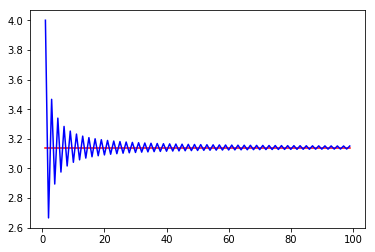

In [6]:
#Overlay the true value with the summations
p=np.ones(len(x))*np.pi
plt.plot(x,p,'r',x,y,'b');
plt.savefig('3c.png')

# Problem 5.

In [7]:
#Data from the file
x = np.linspace(-1,1,21)
y = np.array([-0.785398,-0.732815,-0.674741,-0.610726,-0.540420,-0.463648,-0.380506,-0.291457,-0.197396,-0.099669,0.000000,0.099669,0.197396,0.291457,0.380506,0.463648,0.540420,0.610726,0.674741,0.732815,0.785398])

In [8]:
#Create the stencils and h values
n=len(x)
h=(x[-1]-x[0])/(n-1)
s_int=np.array([-1/2,0,1/2])/h #[u[0],u[1],u[2]], [u[1],u[2],u[3]],...,[u[n-3],u[n-2],u[n-1]]
s_left=np.array([-3/2,2,-1/2])/h #[u[0],u[1],u[2]]
s_right=np.array([1/2,-2,3/2])/h #[u[-3],u[-2],u[-1]]

#construct the derivative array with the left right and then range of centered differences
yp=[]
yp.append(np.array([y[0],y[1],y[2]]).dot(s_left))
for k in range(1,n-1):
    yp.append(np.array([y[k-1],y[k],y[k+1]]).dot(s_int))
yp.append(np.array([y[-3],y[-2],y[-1]]).dot(s_right))

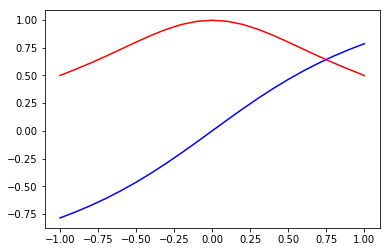

In [9]:
#Overlay the derivative slopes and the function
plt.plot(x,y,'b',x,yp,'r');
plt.savefig('5.png')

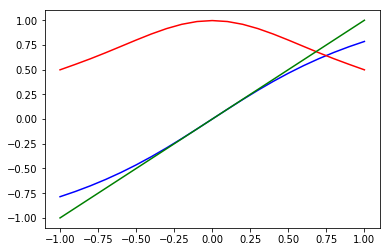

In [10]:
#Note that the derivative at 0 is 1, abd the point is (0,0). Overlay tangent
plt.plot(x,y,'b',x,yp,'r',x,x,'g');
plt.savefig('5b.png')

# Problem 6

In [11]:
#Write the function as the square minus the value
def f(x,n):
    return x**2-n
def dx(x):
    return 2*x

In [12]:
#Run the newton method loop to get the root
n=2
x0=1
err=1
tol=10**-8
while(abs(err)>tol):
    x1=x0-f(x0,n)/dx(x0)
    err=x1**2-2
    x0=x1
print(x0)

1.4142135623746899


In [13]:
np.sqrt(2)-x0

-1.5947243525715749e-12

# Problem 7

In [14]:
#Now define the inverse function
def f(x,n):
    return -n+1/x
def dx(x):
    return -x**-2

In [15]:
#Run our newton method to find the root
n=10
tol=10**-8
x0=tol
err=1

while(abs(err)>tol):
    x1=x0-f(x0,n)/dx(x0)
    err=f(x1,n)
    x0=x1
print(x0)

0.09999999999978022


# Problem 10

In [16]:
#My Fresnel Cosine integral function from the sum computed analytically at x with n terms
def myfres(x,n):
    s=0
    for i in range(0,n):
        s+=(((-1)**i)*(np.pi**(2*i))*(x**(4*i+1)))/((4*i+1)*(2**(2*i))*(np.math.factorial(2*i)))
    return s
    

In [17]:
#The maximum error is the 3rd term of the series
myfres(1,3)-myfres(1,2)

0.028185500877894176

In [18]:
#Error at right end point
myfres(1,2)-fresnel(1)[1]

-0.026633510404056926

In [19]:
#What is machine epsilon?
eps=np.finfo(float).eps
print(eps)

2.220446049250313e-16


In [20]:
#Loop to find the term less than machine epsilon
i=1
err=1
while(abs(err)>eps):
    s=(((-1)**i)*(np.pi**(2*i))*(1**(4*i+1)))/((4*i+1)*(2**(2*i))*(np.math.factorial(2*i)))
    err=abs(abs(s)-eps)
    i+=1
print(i)

11


In [21]:
#Subtract 1 due to loop structure, and then test to see if less than machine epsilon
i=10
s=(((-1)**i)*(np.pi**(2*i))*(1**(4*i+1)))/((4*i+1)*(2**(2*i))*(np.math.factorial(2*i)))
print(s)
print(s-eps)
if(s<eps):
    print("yes")

8.384729705118548e-17
-1.3819730787384582e-16
yes


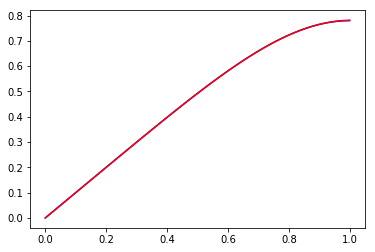

In [22]:
x = np.linspace(0,1)
plt.plot(x,fresnel(x)[1],'b',x,myfres(x,3),'r');
plt.savefig('10b.png')

In [23]:
3.14159-3.141591

-1.000000000139778e-06